```
# This is formatted as code
```
<h1>Implementation of Internet of Things in Developing Hybrid Energy Harvesting System </h1>
<h3><p>ADRIAN I. DELA CRUZ </p>
<p>JAMES FREDERIC B. DULO </p>
<p>GELAN M. NICOLAN </p>
<p>ARVENELL ABAD </p>





In [52]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [53]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split
#Linear Regression Algorithm from sklearn
from sklearn import linear_model
#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Standard Scaler for Standardization
from sklearn.preprocessing import StandardScaler
#warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
#Load the dataset
df = pd.read_csv("Hybrid Panel testing.csv", index_col=0)
#Display the dataset
df

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nVoltage\n(V),Average Solar\nCurrent (A),Average Solar\nPower\n(W),Average Piezo\nVoltage\n(V),Average Piezo\nCurrent \n(A),Average Piezo\nPower\n(W)
Hours,,,,,,,,
7:00 AM,30.01,74.19,0.89,0.356,0.31684,0.390,0.1560,6.084000e-02
8:00 AM,29.82,75.13,0.90,0.360,0.32400,0.410,0.1640,6.724000e-02
9:00 AM,30.91,75.19,0.94,0.376,0.35344,0.400,0.1600,6.400000e-02
10:00 AM,29.99,75.59,0.95,0.380,0.36100,0.380,0.1520,5.776000e-02
11:00 AM,28.92,74.21,0.90,0.360,0.32400,0.400,0.1600,6.400000e-02
...,...,...,...,...,...,...,...,...
2:00 PM,33.90,54.70,4.09,1.636,6.69124,0.001,0.0004,4.000000e-07
3:00 PM,33.89,53.59,3.37,1.348,4.54276,0.001,0.0004,4.000000e-07
4:00 PM,32.67,58.03,1.93,0.772,1.48996,0.001,0.0004,4.000000e-07


In [55]:
#Preprocessing
df = df.drop(['Average Solar\nVoltage\n(V)','Average Solar\nCurrent (A)','Average Piezo\nVoltage\n(V)','Average Piezo\nCurrent \n(A)', 'Average Piezo\nPower\n(W)'], axis=1)

In [56]:
df.describe()

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W)
count,2016.000000,2016.000000,2016.000000
mean,30.678611,63.732778,1.009474
std,2.512029,8.638364,1.374527
min,25.250000,40.900000,0.000960
25%,29.017500,58.122500,0.324000
50%,30.520000,60.600000,0.462500
75%,32.325000,74.035000,1.173670
max,35.100000,76.420000,6.691240


In [57]:
#check for null values
df.isnull().sum()

Average\nHeat Index\n(°C)    0
Average\nHumidity\n(%)       0
Average Solar\nPower\n(W)    0
dtype: int64

In [58]:
#Get the correlation of the attributes
corr = df.corr()
corr

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W)
Average\nHeat Index\n(°C),1.000000,-0.264770,0.687092
Average\nHumidity\n(%),-0.264770,1.000000,-0.393007
Average Solar\nPower\n(W),0.687092,-0.393007,1.000000


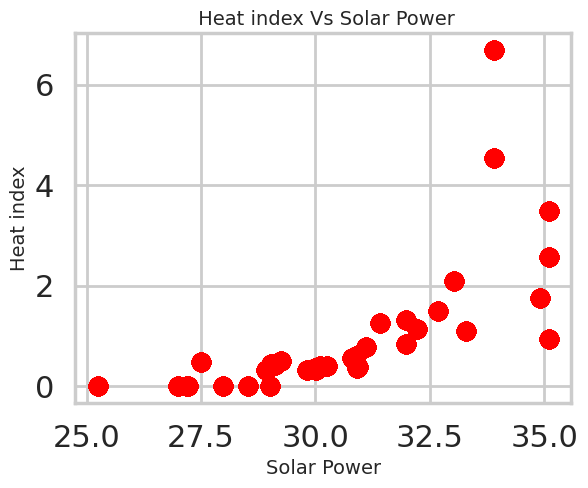

In [59]:
plt.scatter(df['Average\nHeat Index\n(°C)'], df['Average Solar\nPower\n(W)'], color='red')
plt.title(' Heat index Vs Solar Power', fontsize=14)
plt.xlabel('Solar Power', fontsize=14)
plt.ylabel('Heat index', fontsize=14)
plt.grid(True)
plt.show()

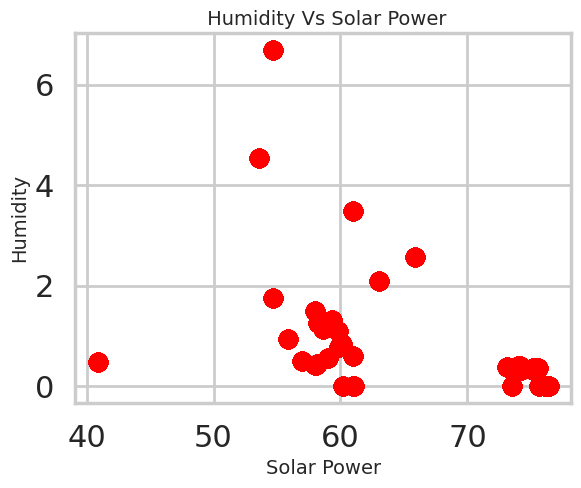

In [99]:
plt.scatter(df['Average\nHumidity\n(%)'], df['Average Solar\nPower\n(W)'], color='red')
plt.title(' Humidity Vs Solar Power', fontsize=14)
plt.xlabel('Solar Power', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
plt.show()

<Axes: >

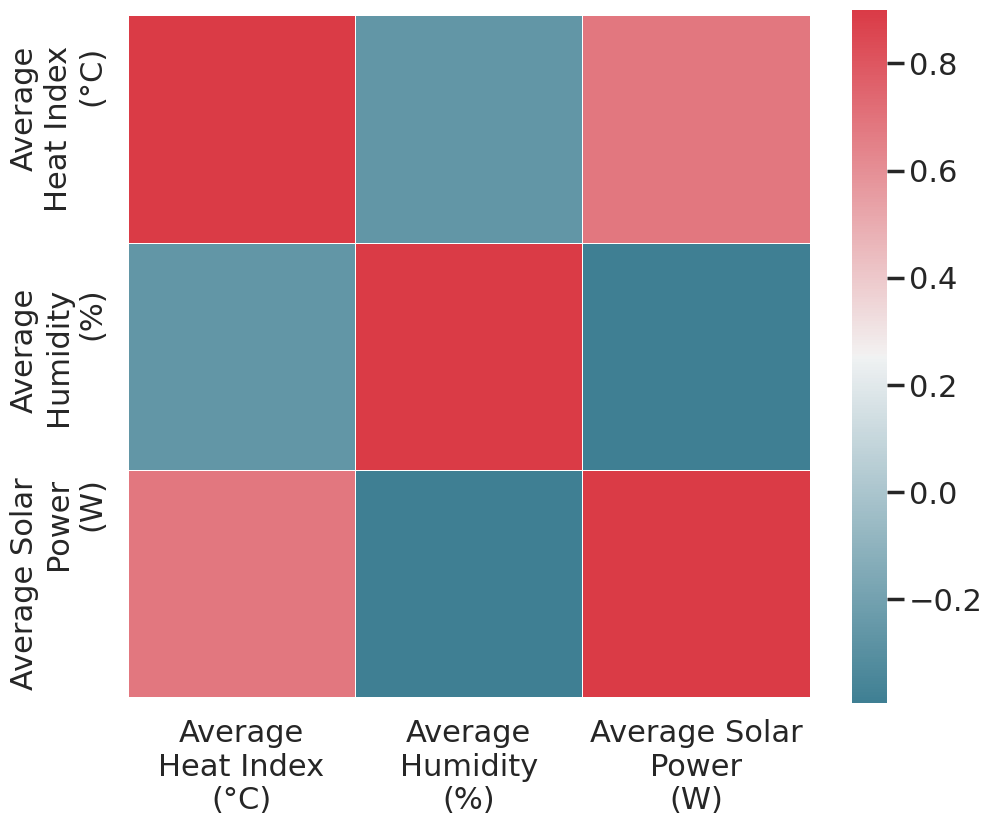

In [61]:
#Visualize Correlation
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

In [62]:
#Split the dataset to training and testing set
#Lets consider TV and radio to determine the advertising sales
df_train, df_test = train_test_split(df, test_size=0.25, random_state=35)

x_train = df_train[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_train = df_train['Average Solar\nPower\n(W)']

x_test = df_test[['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)']]
y_test = df_test['Average Solar\nPower\n(W)']

In [63]:
#Instantiate the Scaler
scaler = StandardScaler()
#Fit to the TRAIN set
scaler.fit(x_train)
#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)
#Apply to the TEST set
x_test_s = scaler.transform(x_test)

In [64]:
x_train_s
df.head()

,Average\nHeat Index\n(°C),Average\nHumidity\n(%),Average Solar\nPower\n(W)
Hours,,,
7:00 AM,30.01,74.19,0.31684
8:00 AM,29.82,75.13,0.32400
9:00 AM,30.91,75.19,0.35344
10:00 AM,29.99,75.59,0.36100
11:00 AM,28.92,74.21,0.32400


In [65]:
#Instantiate the Linear Regression Algorithm
linreg = linear_model.LinearRegression()
#Train the Model
linreg.fit(x_train_s, y_train)

LinearRegression()

In [66]:
#Verifying Coefficient
pd.DataFrame(linreg.coef_, index=x_train.columns, columns=['Coef'])

,Coef
Average\nHeat Index\n(°C),0.866582
Average\nHumidity\n(%),-0.312027


In [67]:
# Validate the Model
# Predict the values
y_pred = linreg.predict(x_test_s)
y_pred

array([ 2.44671435,  0.39983188,  0.30039363,  0.75576707,  1.72237941,
        1.2215748 ,  2.05006729,  0.686246  ,  2.81198315, -0.16221547,
        0.67168754,  2.05006729,  2.62569606,  0.39983188,  1.2215748 ,
        0.64686751,  0.39983188,  2.44671435,  1.2215748 , -0.16221547,
        0.7575776 ,  0.44067144,  0.75576707,  0.64686751,  1.29528653,
       -0.64103544,  0.30039363,  2.78692069,  2.44463868,  1.2215748 ,
        1.29528653,  0.02561581,  0.64686751,  0.48498937, -0.16221547,
        0.08238815,  0.7575776 ,  0.64686751,  2.44671435,  1.72237941,
        0.64686751,  1.90154802, -0.37003071,  0.76804756,  0.67683617,
        0.75576707,  1.58987602, -0.64103544,  0.75576707, -0.75084067,
       -0.16221547,  2.05006729, -0.37003071,  0.75576707,  0.3418413 ,
        0.686246  , -0.12052536,  2.78692069,  0.7575776 ,  0.48498937,
        1.2215748 , -0.12052536,  2.05006729,  1.29528653,  1.8415361 ,
        0.76804756, -0.75084067,  2.62569606, -0.64103544,  0.08

In [68]:
#PERFORMANCE METRICS

In [69]:
df_results = pd.DataFrame(y_test)
df_results["Predicted Solar Power"] = y_pred
df_results

,Average Solar\nPower\n(W),Predicted Solar Power
Hours,,
12:00 PM,2.580640,2.446714
7:00 AM,0.316840,0.399832
8:00 AM,0.324000,0.300394
6:00 PM,0.484000,0.755767
12:00 PM,1.142440,1.722379
...,...,...
4:00 PM,0.003168,-0.162215
7:00 AM,0.316840,0.399832
12:00 PM,0.384160,0.757578


In [70]:
# Create a new dataframe containing the predictor variables, test results, and predicted results
results_df = pd.DataFrame({'Heat Index (°C)': x_test['Average\nHeat Index\n(°C)'],
                           'Humidity (%)': x_test['Average\nHumidity\n(%)'],
                           'Actual Solar Power (W)': y_test,
                           'Predicted Solar Power (W)': y_pred})
results_df

,Heat Index (°C),Humidity (%),Actual Solar Power (W),Predicted Solar Power (W)
Hours,,,,
12:00 PM,35.10,65.90,2.580640,2.446714
7:00 AM,30.01,74.19,0.316840,0.399832
8:00 AM,29.82,75.13,0.324000,0.300394
6:00 PM,27.50,40.90,0.484000,0.755767
12:00 PM,32.21,58.62,1.142440,1.722379
...,...,...,...,...
4:00 PM,28.52,75.60,0.003168,-0.162215
7:00 AM,30.01,74.19,0.316840,0.399832
12:00 PM,30.94,73.12,0.384160,0.757578


In [71]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

r2: 54.65
mae: 0.53
mse: 0.80
rmse: 0.89


In [75]:
x_test.columns

Index(['Average\nHeat Index\n(°C)', 'Average\nHumidity\n(%)'], dtype='object')

In [78]:
#x_test.rename(columns={'Average\nHeat Index\n(°C)': 'Averageheatindex', 'Average\nHumidity\n(%)': 'Averagehumidity'})


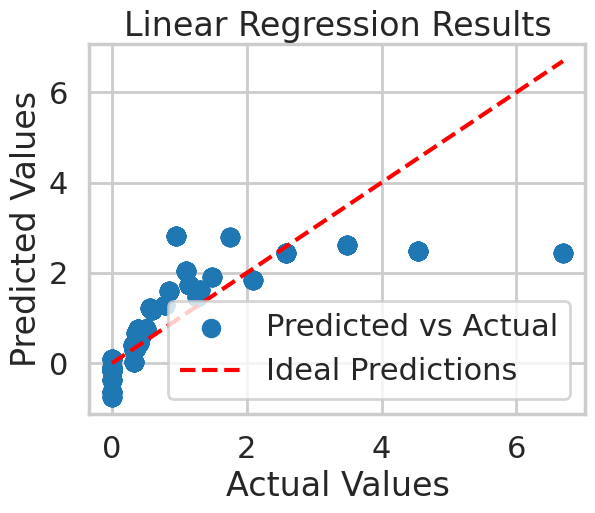

In [84]:
#visualizing results
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.legend(loc='lower right')
plt.show()

In [ ]:
temperature = float(input('Enter temperature: '))
humidity = float(input('Enter humidity: '))

input_data = scaler.transform([[temperature, humidity]])
predicted_power = linreg.predict(input_data)[0]

print('Predicted solar power:', predicted_power)